In [1]:
from array import array
import math
import random

def generator_function(x):
    return 3.0/2.0*(1.0 - x*x)

random.seed(1)

max_order = 3
min_order = 1
nbins = 20

norders = max_order - min_order + 1
nbin = nbins

np = array('d')
enp = array('d')
sum2 = array('d')
esum2 = array('d')
esum3 = array('d')
np2 = array('d')
np2mid = array('d')

summid = array('d')
esummid = array('d')
esummid3 = array('d')

sum = [[0 for x in range(0,nbin)] for y in range(0,norders)]

for j in range(min_order,max_order+1):
    npoints = math.pow(10,j)
    np.append(npoints)
    np2.append(math.log10(npoints))
    np2mid.append(math.log10(npoints))
    enp.append(0.0)
    sum2.append(0.0)
    esum2.append(0.0)
    esum3.append(0.0)
    
    summid.append(0.0)
    esummid.append(0.0)
    esummid3.append(0.0)
    
    xlow = -1.0
    xhigh = 1.0
    ylow = -1.0
    yhigh = 1.0
    dx = (xhigh-xlow)/npoints
    dy = (yhigh-ylow)/npoints
        
    for i in range(0,int(npoints)):
        xmid = xlow+i*dx+dx/2.0
        zmid_temp = generator_function(xmid)
        for l in range(0,int(npoints)):
            ymid = ylow + l*dy+dy/2.0
            zmid = zmid_temp*generator_function(ymid)
            summid[j-min_order] += dx*dy*zmid
        
    print("Midpoint integral = %.16f" % summid[j-min_order])
    esummid[j-min_order]=math.fabs(4.0-summid[j-min_order])
    print("Midpoint Error = %.16f" % esummid[j-min_order])
    esummid3[j-min_order]=math.log10(esummid[j-min_order])
    
    for k in range(0,nbin):
        for i in range(0,int(npoints)):
            xval = xlow+random.random()*(xhigh-xlow)
            zval_temp = generator_function(xval)
            for l in range(0,int(npoints)):
                yval = ylow+random.random()*(yhigh-ylow)
                zval = zval_temp*generator_function(yval)
                sum[j-min_order][k] += dx*dy*zval
        
    for k in range(0,nbin):
        sum2[j-min_order] += sum[j-min_order][k]/nbin
        
    for k in range(0,nbin):
        esum2[j-min_order] += math.pow((sum[j-min_order][k]-sum2[j-min_order]),2)/nbin
    
    esum2[j-min_order]=math.sqrt(esum2[j-min_order])
    print("MC Integral = %.16f +/- %.16f for npoints = %d" %(sum2[j-min_order],esum2[j-min_order],npoints))
    print("MC Error = %.16f" % math.fabs(4.0-sum2[j-min_order]))
    esum3[j-min_order]=math.log10(esum2[j-min_order])

Midpoint integral = 4.0401000000000016
Midpoint Error = 0.0401000000000016
MC Integral = 3.9819759697039521 +/- 0.6783898865678992 for npoints = 10
MC Error = 0.0180240302960479
Midpoint integral = 4.0004000100000185
Midpoint Error = 0.0004000100000185
MC Integral = 3.9808831268227398 +/- 0.1676221588025610 for npoints = 100
MC Error = 0.0191168731772602
Midpoint integral = 4.0000040000010495
Midpoint Error = 0.0000040000010495
MC Integral = 4.0069175792673057 +/- 0.0671487428505256 for npoints = 1000
MC Error = 0.0069175792673057


array('d', [10.0, 100.0, 1000.0]) array('d', [4.040100000000002, 4.0004000100000185, 4.0000040000010495]) array('d', [0.04010000000000158, 0.0004000100000185469, 4.0000010494978255e-06])


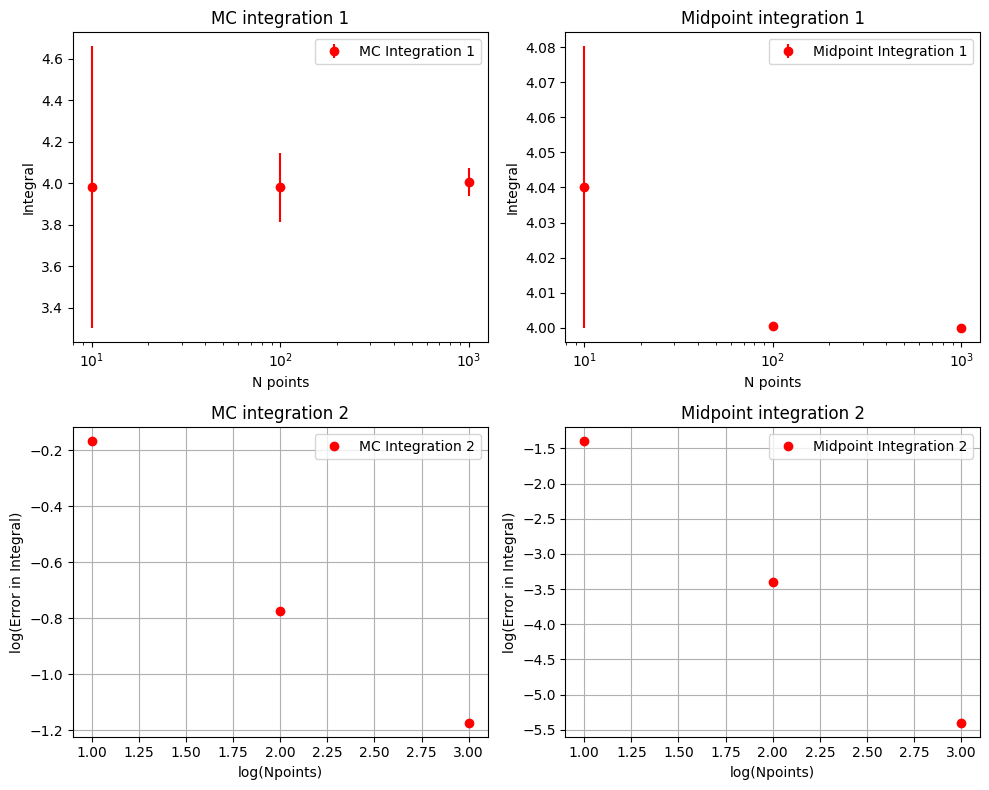

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

print (np,summid,esummid)

# MC integration 1
axes[0, 0].set_xscale('log')
axes[0, 0].errorbar(np, sum2, yerr=esum2, fmt='o', color='r', label='MC Integration 1')
axes[0, 0].set_xlabel('N points')
axes[0, 0].set_ylabel('Integral')
axes[0, 0].set_title('MC integration 1')
axes[0, 0].legend()

# Midpoint integration 1
axes[0, 1].set_xscale('log')
axes[0, 1].errorbar(np, summid, yerr=esummid, fmt='o', color='r', label='Midpoint Integration 1')
axes[0, 1].set_xlabel('N points')
axes[0, 1].set_ylabel('Integral')
axes[0, 1].set_title('Midpoint integration 1')
axes[0, 1].legend()

# MC integration 2
axes[1, 0].plot(np2, esum3, 'o', color='r', label='MC Integration 2')
axes[1, 0].set_xlabel('log(Npoints)')
axes[1, 0].set_ylabel('log(Error in Integral)')
axes[1, 0].set_title('MC integration 2')
axes[1, 0].legend()
axes[1, 0].grid()

# Midpoint integration 2
axes[1, 1].plot(np2mid, esummid3, 'o', color='r', label='Midpoint Integration 2')
axes[1, 1].set_xlabel('log(Npoints)')
axes[1, 1].set_ylabel('log(Error in Integral)')
axes[1, 1].set_title('Midpoint integration 2')
axes[1, 1].legend()
axes[1, 1].grid()

plt.tight_layout()
plt.show()
